---
---
# Propensity Score Matching

## The Path from Cause to Effect


---
---

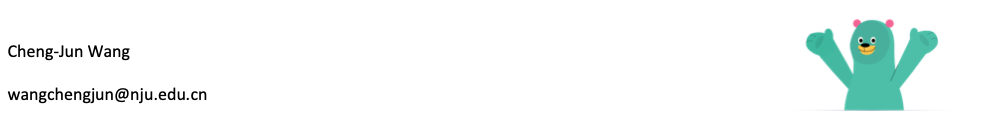

http://www.masteringmetrics.com/resources/

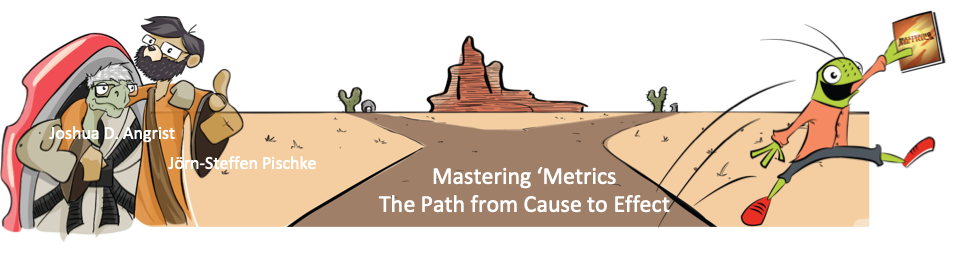

https://www.bilibili.com/video/BV1AE4114754

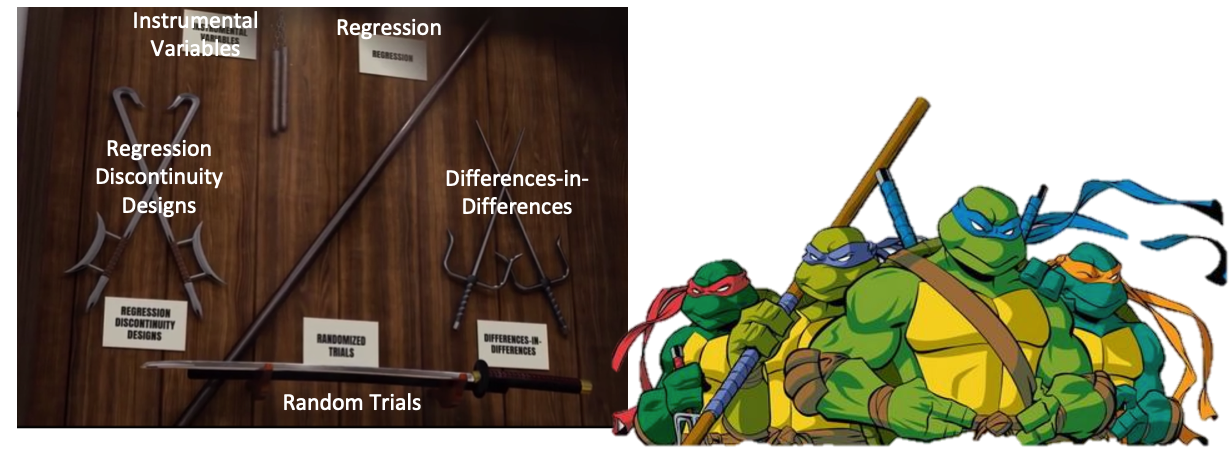

Join MIT professor Josh Angrist and learn to [master the econometrics "Furious Five"](https://mru.org/courses/mastering-econometrics/path-cause-effect): random assignment,regression, instrumental variables, regresh Angrist and learn to master the econometrics "Furious Five"


The most basic of these tools is regression, which compares treatment and control subjects who have the same observed characteristics. 

Regression-based causal inference is predicated on the assumption that:

> when key observed variables have been made equal across treatment and control groups, selection bias from the things we can’t see is also mostly eliminated. 



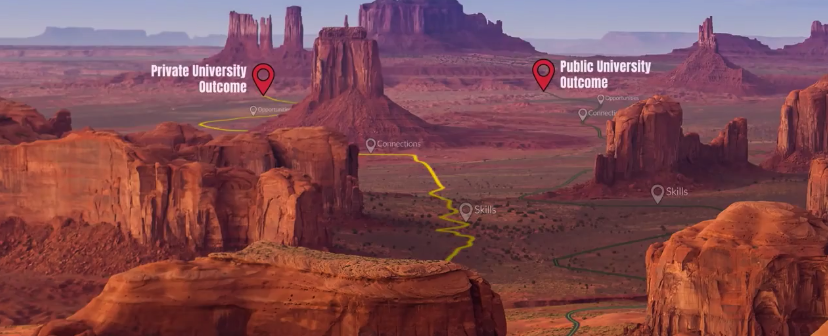

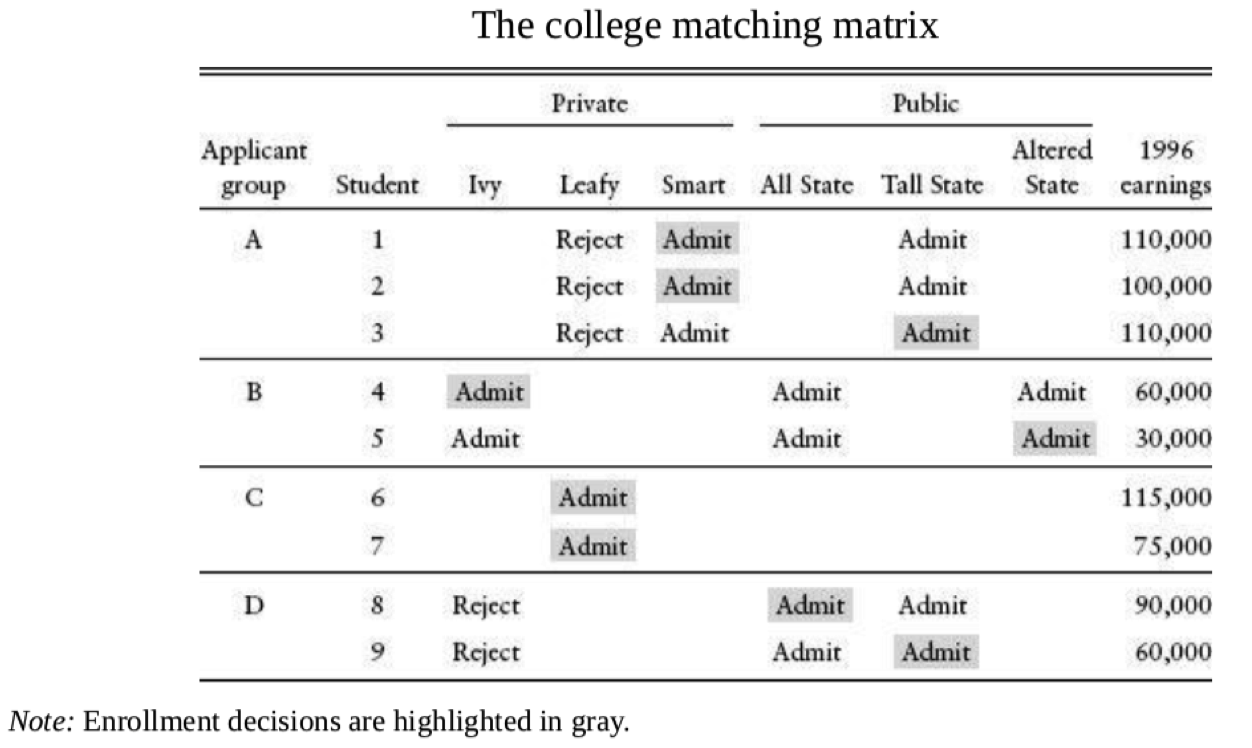

In [5]:
* Uncontrolled comparison 
dis (110+100+60+115+75)*1000/5 - (110+30+90+60)*1000/4 

19500


**A ceteris paribus (everything-equal) comparision**

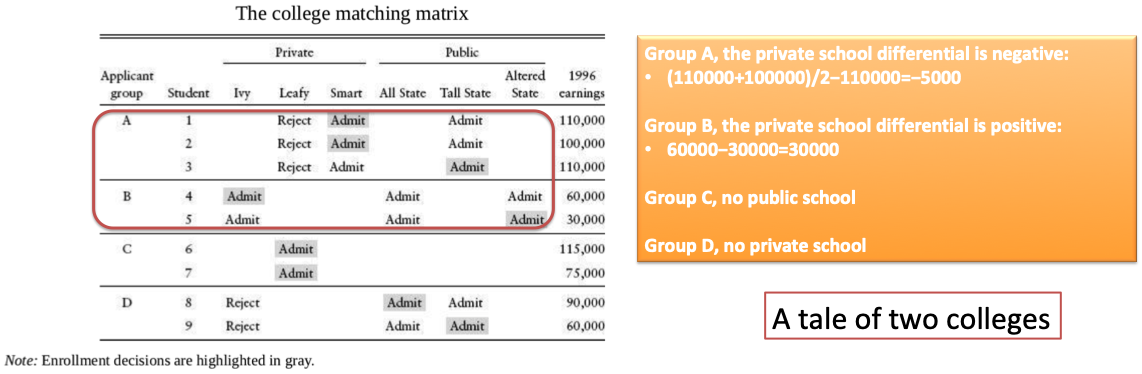

$$\frac{3}{5}*-5000 + \frac{2}{5}*30000 = 9000$$

In [5]:
dis 3/5*-5000 + 2/5*30000

9000


Even when limited to the five students in groups A and B, the uncontrolled comparison generates a gap of $20,000

$$(110+100+60)*1000/3 - (110+30)*1000/2 = 20000$$



In [2]:
dis (110+100+60)*1000/3 - (110+30)*1000/2 

20000


**Estimating The Payoff Of Attending A More Selective College**

Dale, Stacy Berg and Alan B. Krueger. "Estimating The Payoff Of Attending A More Selective College: An Application Of Selection On Observables And Unobservables," Quarterly Journal of Economics, 2002, v107(4,Nov), 1491-1527.

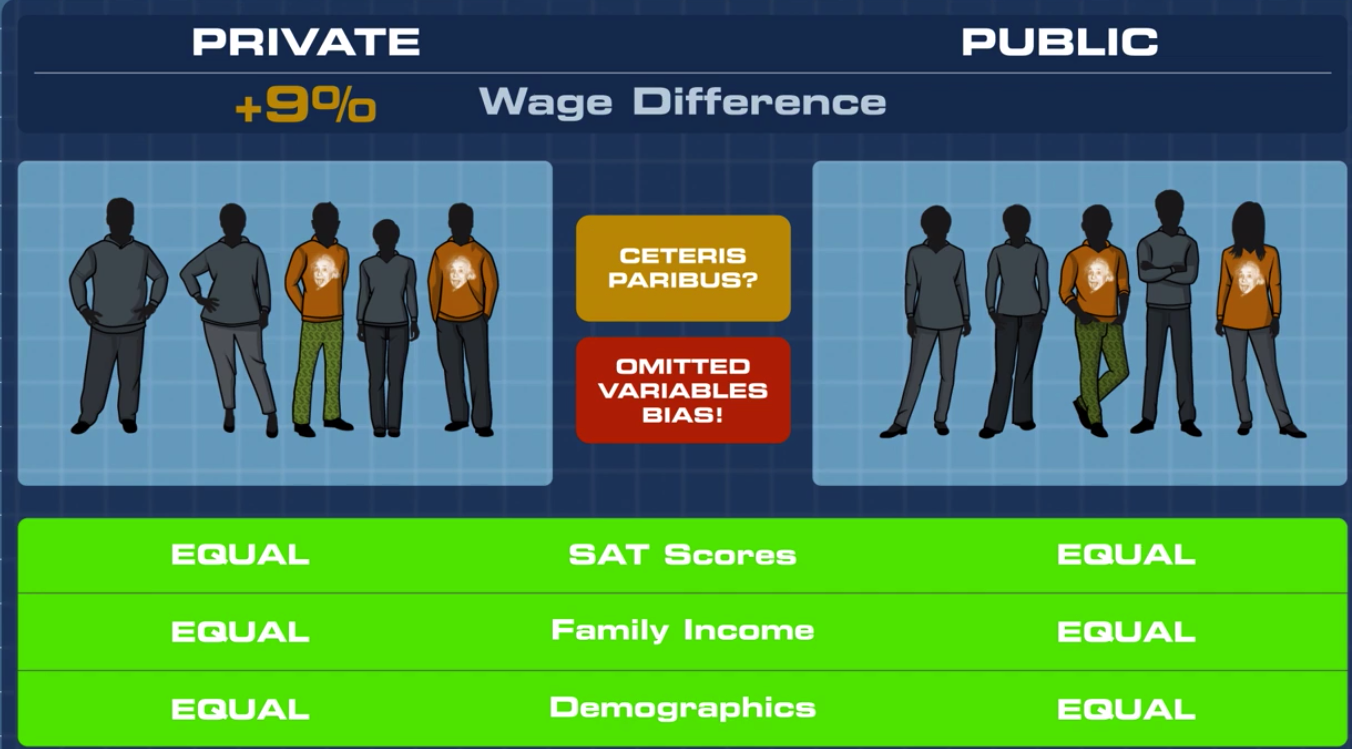

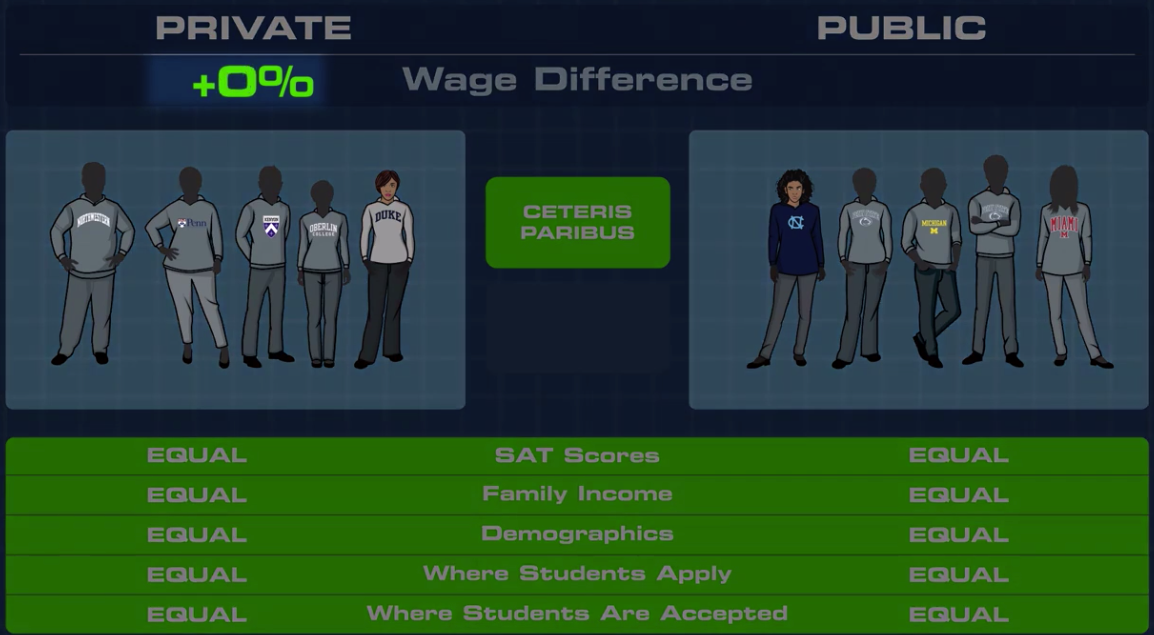

## Ambition and Ability

These much larger uncontrolled comparisons reflect selection bias: 
- students who apply to and are admitted to private schools have higher earnings wherever they ultimately chose to go.

- the cross-group differential is explained by a combination of ambition and ability






Gary King & Richard Nielsen(2015) Why Propensity Scores Should Not Be Used for Matching

- The goal of PSM is to reduce imbalance in the chosen pre-treatment covariates between the treated and control groups, thereby reducing the degree of model dependence and potential for bias. 
- We show here that PSM often accomplishes the opposite of what is intended — increasing imbalance, inefficiency, model dependence, and bias. 
- The weakness of PSM is that it attempts to approximate a completely randomized experiment, rather than, as with other matching methods, a more powerful fully blocked randomized experiment. 
- PSM, unlike other matching methods, is thus blind to the often large portion of imbalance that could have been eliminated by approximating full blocking. 
- Moreover, in data balanced enough to approximate complete randomization, either to begin with or after pruning some observations, PSM approximates random matching which turns out to increase imbalance. 
- For other matching methods, the point where additional pruning increases imbalance occurs much later in the pruning process, when full blocking is approximated and there is no reason to prune, and so the danger is considerably less. 
- We show that these problems with PSM occur even in data designed for PSM, with as few as two covariates, and in many real applications. 
- Although these results suggest that researchers replace PSM with one of the other available methods when performing matching, propensity scores have many other productive uses.

In [120]:
net install st0026_2.pkg, replace from(http://www.stata-journal.com/software/sj5-3/)

checking st0026_2 consistency and verifying not already installed...
installing into /Users/datalab/Library/Application Support/Stata/ado/plus/...
installation complete.


In [7]:
sysdir

   STATA:  /Applications/Stata/
    BASE:  /Applications/Stata/ado/base/
    SITE:  /Applications/ado/
    PLUS:  /Users/datalab/Library/Application Support/Stata/ado/plus/
PERSONAL:  /Users/datalab/Library/Application Support/Stata/ado/personal/
OLDPLACE:  ~/ado/


In [121]:
* Propensity Score Matching in Stata
* Copyright 2013 by Ani Katchova
clear all
set more off

In [122]:
cd "/Users/datalab/github/css/data/psm/"

/Users/datalab/github/datascience/causal-inference/psm


In [123]:
use matching_earnings.dta

In [124]:
des


Contains data from matching_earnings.dta
  obs:         2,675                          
 vars:            19                          18 Mar 2009 17:33
 size:       203,300                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
TREAT           float   %9.0g                 
AGE             float   %9.0g                 
EDUC            float   %9.0g                 
BLACK           float   %9.0g                 
HISP            float   %9.0g                 
MARR            float   %9.0g                 
RE74            float   %9.0g                 
RE75            float   %9.0g                 
RE78            float   %9.0g                 
U74             float   %9.0g                 
U75             float   %9.0g                 
AGESQ           flo

# pscore

In [131]:
* Define treatment, outcome, and independent variables
global treatment TREAT
global ylist RE78
global xlist AGE EDUC MARR 
global breps 5

* For difference-in-differences, outcome is the differences in outcomes after and before
* global ylist REDIFF 

describe $treatment $ylist $xlist
summarize $treatment $ylist $xlist

bysort $treatment: summarize $ylist $xlist







              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
TREAT           float   %9.0g                 
RE78            float   %9.0g                 
AGE             float   %9.0g                 
EDUC            float   %9.0g                 
MARR            float   %9.0g                 


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       TREAT |      2,675    .0691589    .2537716          0          1
        RE78 |      2,675    20502.38    15632.52          0     121174
         AGE |      2,675    34.22579    10.49984         17         55
        EDUC |      2,675    11.99439    3.053556          0         17
        MARR |      2,675    .8194393    .3847257          0          1


--------------------------------------------------------------------

In [132]:
* Regression with a dummy variable for treatment (t-test)
reg $ylist $treatment 

* Regression with a dummy variable for treatment controlling for x
reg $ylist $treatment $xlist



      Source |       SS           df       MS      Number of obs   =     2,675
-------------+----------------------------------   F(1, 2673)      =    173.41
       Model |  3.9811e+10         1  3.9811e+10   Prob > F        =    0.0000
    Residual |  6.1365e+11     2,673   229573201   R-squared       =    0.0609
-------------+----------------------------------   Adj R-squared   =    0.0606
       Total |  6.5346e+11     2,674   244375675   Root MSE        =     15152

------------------------------------------------------------------------------
        RE78 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       TREAT |  -15204.78   1154.614   -13.17   0.000     -17468.8   -12940.75
       _cons |   21553.92   303.6414    70.98   0.000     20958.53    22149.32
------------------------------------------------------------------------------


      Source |       SS           df       MS  

In [133]:
* Propensity score matching with common support
pscore $treatment $xlist, pscore(myscore) blockid(myblock) comsup




**************************************************** 
Algorithm to estimate the propensity score 
**************************************************** 


The treatment is TREAT

      TREAT |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,490       93.08       93.08
          1 |        185        6.92      100.00
------------+-----------------------------------
      Total |      2,675      100.00



Estimation of the propensity score 

Iteration 0:   log likelihood = -672.64954
Iteration 1:   log likelihood = -445.24322
Iteration 2:   log likelihood = -417.65611
Iteration 3:   log likelihood = -414.43392
Iteration 4:   log likelihood = -414.37065
Iteration 5:   log likelihood = -414.37062

Probit regression                                 Number of obs   =       2675
                                                  LR chi2(3)      =     516.56
                                                  Prob > chi2     =     0.0000
L

In [134]:
* Matching methods 

* Nearest neighbor matching 
attnd $ylist $treatment $xlist, pscore(myscore) comsup boot reps($breps) dots 


> 


 The program is searching the nearest neighbor of each treated unit. 
 This operation may take a while.



ATT estimation with Nearest Neighbor Matching method 
(random draw version)
Analytical standard errors

---------------------------------------------------------
n. treat.   n. contr.         ATT    Std. Err.          t
---------------------------------------------------------

      185         431   -6715.251     1200.953     -5.592

---------------------------------------------------------
Note: the numbers of treated and controls refer to actual
nearest neighbour matches





Bootstrapping of standard errors 

command:      attnd RE78 TREAT AGE EDUC MARR , pscore(myscore) comsup
statistic:    attnd      = r(attnd)
.....


Bootstrap statistics                              Number of obs    =      2675
                                                  Replications     =         5

------------------------------------------------------------------------------
Variable     |  

In [135]:
* Radius matching 
attr $ylist $treatment $xlist, pscore(myscore) comsup boot reps($breps) dots radius(0.1)




 The program is searching for matches of treated units within radius. 
 This operation may take a while.



ATT estimation with the Radius Matching method
Analytical standard errors

---------------------------------------------------------
n. treat.   n. contr.         ATT   Std. Err.           t
---------------------------------------------------------

      185        2147   -1.33e+04     652.019     -20.324

---------------------------------------------------------
Note: the numbers of treated and controls refer to actual
matches within radius





Bootstrapping of standard errors 

command:      attr RE78 TREAT AGE EDUC MARR , pscore(myscore) comsup radius(.1)
statistic:    attr       = r(attr)
.....


Bootstrap statistics                              Number of obs    =      2675
                                                  Replications     =         5

------------------------------------------------------------------------------
Variable     |  Reps  Observed      Bias  

In [136]:
* Kernel Matching
attk $ylist $treatment $xlist, pscore(myscore) comsup boot reps($breps) dots




 The program is searching for matches of each treated unit. 
 This operation may take a while.



ATT estimation with the Kernel Matching method 

---------------------------------------------------------
n. treat.   n. contr.         ATT   Std. Err.           t
---------------------------------------------------------

      185        2147   -7009.315           .           .

---------------------------------------------------------
Note: Analytical standard errors cannot be computed. Use
the bootstrap option to get bootstrapped standard errors.





Bootstrapping of standard errors 

command:      attk RE78 TREAT AGE EDUC MARR , pscore(myscore) comsup bwidth(.06)
statistic:    attk       = r(attk)
.....


Bootstrap statistics                              Number of obs    =      2675
                                                  Replications     =         5

------------------------------------------------------------------------------
Variable     |  Reps  Observed      Bias  

In [137]:
* Stratification Matching
atts $ylist $treatment $xlist, pscore(myscore) blockid(myblock) comsup boot reps($breps) dots






ATT estimation with the Stratification method
Analytical standard errors

---------------------------------------------------------
n. treat.   n. contr.         ATT   Std. Err.           t
---------------------------------------------------------

      184        2148   -6497.606           .           .

---------------------------------------------------------





Bootstrapping of standard errors 

command:      atts RE78 TREAT AGE EDUC MARR , pscore(myscore) blockid(myblock) c
> omsup
statistic:    atts       = r(atts)
.....

note: label truncated to 80 characters

Bootstrap statistics                              Number of obs    =      2675
                                                  Replications     =         5

------------------------------------------------------------------------------
Variable     |  Reps  Observed      Bias  Std. Err. [95% Conf. Interval]
-------------+----------------------------------------------------------------
        atts |     5 -6497.605

## psestimate 筛选匹配变量的一阶、二阶形式

In [125]:
psestimate TREAT RE78, totry(AGE EDUC MARR BLACK HISP)


Selecting first order covariates... (15)
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
....s...s..s.ss.
Selected first order covariates are: MARR BLACK AGE HISP EDUC
Selecting second order covariates... (231)
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
....................s...................s.........    50
.........s.................s................s.....   100
...........
Selected second order covariates are: c.EDUC#c.AGE c.EDUC#c.BLACK c.AGE#c.BLACK 
> c.AGE#c.AGE c.BLACK#c.MARR
Final model is: RE78 MARR BLACK AGE HISP EDUC c.EDUC#c.AGE c.EDUC#c.BLACK c.AGE#
> c.BLACK c.AGE#c.AGE c.BLACK#c.MARR


In [90]:
* select RE78 MARR BLACK AGESQ HISP EDUCSQ EDUC AGE c.AGE#c.EDUCSQ c.EDUC

In [126]:
* Define treatment, outcome, and independent variables
global treatment TREAT
global ylist RE78
global xlist MARR BLACK AGESQ HISP EDUCSQ EDUC AGE 
*global xlist AGE EDUC MARR 
global breps 5

In [127]:
* For difference-in-differences, outcome is the differences in outcomes after and before
* global ylist REDIFF 

describe $treatment $ylist $xlist
summarize $treatment $ylist $xlist

bysort $treatment: summarize $ylist $xlist



              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
TREAT           float   %9.0g                 
RE78            float   %9.0g                 
MARR            float   %9.0g                 
BLACK           float   %9.0g                 
AGESQ           float   %9.0g                 
HISP            float   %9.0g                 
EDUCSQ          float   %9.0g                 
EDUC            float   %9.0g                 
AGE             float   %9.0g                 


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       TREAT |      2,675    .0691589    .2537716          0          1
        RE78 |      2,675    20502.38    15632.52          0     121174
        MARR |      2,675    .8194393    .3847257          0          1
       BLACK |      2,675    .

In [130]:
psmatch2 $treatment $xlist, out($ylist)


Probit regression                               Number of obs     =      2,675
                                                LR chi2(7)        =     644.23
                                                Prob > chi2       =     0.0000
Log likelihood = -350.53316                     Pseudo R2         =     0.4789

------------------------------------------------------------------------------
       TREAT |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        MARR |  -1.436539   .1131407   -12.70   0.000    -1.658291   -1.214788
       BLACK |    1.15185   .1337161     8.61   0.000     .8897711    1.413929
       AGESQ |  -.0013987   .0007246    -1.93   0.054    -.0028189    .0000214
        HISP |   1.141139   .2507147     4.55   0.000     .6497472    1.632531
      EDUCSQ |  -.0242514   .0069926    -3.47   0.001    -.0379566   -.0105462
        EDUC |   .3656487    .140998     2.59   0.

In [72]:
* Propensity score matching with common support
* pscore $treatment $xlist, pscore(myscore) blockid(myblock) comsup
* can not install pscore, using psmatch2 instead

In [107]:
*近邻匹配
psmatch2 $treatment $xlist,out($ylist) neighbor(2) ate

note: EDUC omitted because of collinearity

Probit regression                               Number of obs     =      2,675
                                                LR chi2(8)        =     657.17
                                                Prob > chi2       =     0.0000
Log likelihood = -344.06239                     Pseudo R2         =     0.4885

------------------------------------------------------------------------------
       TREAT |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        MARR |   -1.42234   .1135241   -12.53   0.000    -1.644843   -1.199837
       BLACK |   1.163088   .1340631     8.68   0.000     .9003294    1.425847
       AGESQ |  -.0009722   .0007126    -1.36   0.172    -.0023689    .0004245
        HISP |   1.164901   .2531837     4.60   0.000     .6686698    1.661132
      EDUCSQ |  -.0321221   .0074507    -4.31   0.000    -.0467253    -.017519
       

In [108]:
*半径匹配
psmatch2 $treatment $xlist,out($ylist) ate radius caliper(0.01)

note: EDUC omitted because of collinearity

Probit regression                               Number of obs     =      2,675
                                                LR chi2(8)        =     657.17
                                                Prob > chi2       =     0.0000
Log likelihood = -344.06239                     Pseudo R2         =     0.4885

------------------------------------------------------------------------------
       TREAT |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        MARR |   -1.42234   .1135241   -12.53   0.000    -1.644843   -1.199837
       BLACK |   1.163088   .1340631     8.68   0.000     .9003294    1.425847
       AGESQ |  -.0009722   .0007126    -1.36   0.172    -.0023689    .0004245
        HISP |   1.164901   .2531837     4.60   0.000     .6686698    1.661132
      EDUCSQ |  -.0321221   .0074507    -4.31   0.000    -.0467253    -.017519
       

In [109]:
*核匹配

psmatch2 $treatment $xlist,out($ylist) ate kernel

note: EDUC omitted because of collinearity

Probit regression                               Number of obs     =      2,675
                                                LR chi2(8)        =     657.17
                                                Prob > chi2       =     0.0000
Log likelihood = -344.06239                     Pseudo R2         =     0.4885

------------------------------------------------------------------------------
       TREAT |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        MARR |   -1.42234   .1135241   -12.53   0.000    -1.644843   -1.199837
       BLACK |   1.163088   .1340631     8.68   0.000     .9003294    1.425847
       AGESQ |  -.0009722   .0007126    -1.36   0.172    -.0023689    .0004245
        HISP |   1.164901   .2531837     4.60   0.000     .6686698    1.661132
      EDUCSQ |  -.0321221   .0074507    -4.31   0.000    -.0467253    -.017519
       

In [78]:
// * Matching methods 

// * Nearest neighbor matching 
// attnd $ylist $treatment $xlist, pscore(myscore) comsup boot reps($breps) dots 

// * Radius matching 
// attr $ylist $treatment $xlist, pscore(myscore) comsup boot reps($breps) dots radius(0.1)

// * Kernel Matching
// attk $ylist $treatment $xlist, pscore(myscore) comsup boot reps($breps) dots

// * Stratification Matching
// atts $ylist $treatment $xlist, pscore(myscore) blockid(myblock) comsup boot reps($breps) dots

## pstest 进行平衡性假设检验

In [110]:
*对自变量进行平衡性检验
pstest $xlist, both graph


--------------------------------------------------------------------------------
> --------
                Unmatched |       Mean               %reduct |     t-test    |  
> V(T)/
Variable          Matched | Treated Control    %bias  |bias| |    t    p>|t| |  
> V(C)
--------------------------+----------------------------------+---------------+--
> --------
MARR                   U  | .18919   .86627   -184.2         | -25.81  0.000 |  
>    .
                       M  | .18919    .2082     -5.2    97.2 |  -0.46  0.648 |  
>    .
                          |                                  |               |
BLACK                  U  | .84324    .2506    148.0         |  18.13  0.000 |  
>    .
                       M  | .84324   .85038     -1.8    98.8 |  -0.19  0.849 |  
>    .
                          |                                  |               |
AGESQ                  U  | 717.39   1323.5    -97.1         | -10.59  0.000 |  
> 0.31*
                       M  | 717.39    7

In [111]:
pstest $xlist, t($treatment)
* 可以发现，匹配后实验组与控制组的匹配变量均没有显著差异，满足平衡性假设条件


------------------------------------------------------------------------------
                        |       Mean               |     t-test    |  V(T)/
Variable                | Treated Control    %bias |    t    p>|t| |  V(C)
------------------------+--------------------------+---------------+----------
MARR                    | .18919    .2082     -5.2 |  -0.46  0.648 |     .
BLACK                   | .84324   .85038     -1.8 |  -0.19  0.849 |     .
AGESQ                   | 717.39    753.4     -5.8 |  -0.77  0.442 |  0.85
HISP                    | .05946   .03431     12.0 |   1.14  0.254 |     .
EDUCSQ                  | 111.06   110.97      0.2 |   0.02  0.983 |  0.80
EDUC                    | 10.346   10.314      1.2 |   0.15  0.884 |  0.88
AGE                     | 25.816   26.475     -7.4 |  -0.88  0.380 |  0.97
c.AGE#c.EDUCSQ          | 2879.5   2934.9     -2.4 |  -0.36  0.718 |  0.82
EDUC                    | 10.346   10.314      1.2 |   0.15  0.884 |  0.88
---------------

## psgraph 绘图直观呈现各匹配变量的平衡性状况

In [112]:
psgraph
* 比较差。还是样本量的原因。
* 图中也可以直观看出，实验组与控制组的倾向得分值分布大致平衡。

In [116]:
cap log close


## Reference

- 郭申阳 & 马克·W.弗雷泽（2002）倾向值分析：统计方法与应用.重庆大学出版社 
- Ani Katchova (2013) Propensity Score Matching in Stata https://www.bilibili.com/video/av50118270?p=3
- https://www.sohu.com/a/243177248_659080
- https://zhuanlan.zhihu.com/p/73946644

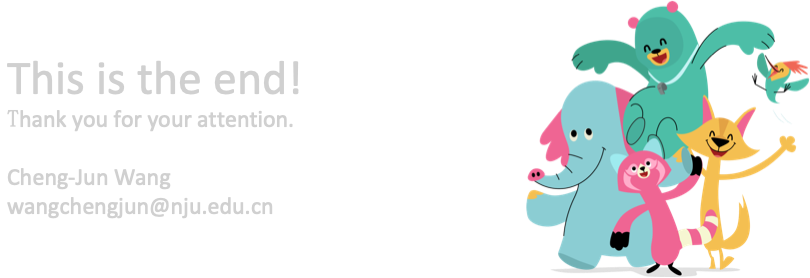